## Grid

variables: k, M, epsilon

can also see how well grid approximates the data for different values of M? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from grid import create_grid_synopsis
from lloyd import lloyd_with_weights
from evaluation_utils import kmeans_loss
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

master_rng = np.random.default_rng(42)

# one function to apply grid synopsis and then non-private kmeans
def cluster_grid(data: np.ndarray, k: int, e:float, M:int, seed:int) -> np.ndarray:

    grid_synopsis = create_grid_synopsis(data, e, data.shape[1], M, seed)

    centers = lloyd_with_weights(k=k, X=grid_synopsis[:,:-1], weights=grid_synopsis[:,-1], n_iter=10, rs = seed)

    return centers

def grid_experiment(data: np.ndarray, k: int, e:float, M:int, n_trials: int) -> float:

    s = master_rng.integers(low=0, high=100000)
    total_loss = 0

    for x in range(0, n_trials):
        centers = cluster_grid(data, k, e, M, s + x)
        total_loss += kmeans_loss(centers, data)

    return total_loss / n_trials

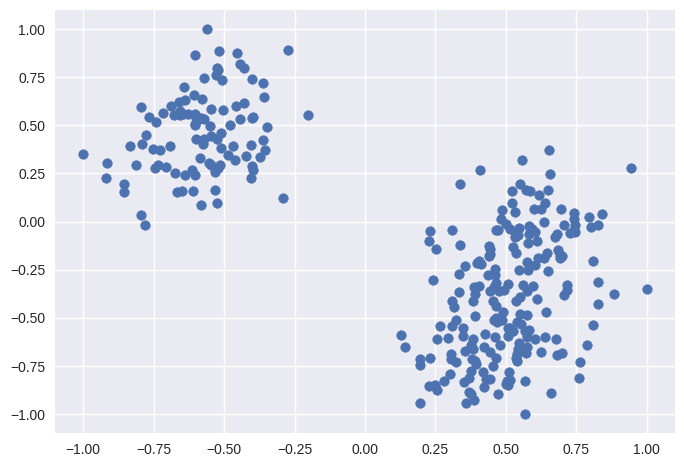

In [10]:
plt.style.use('seaborn-v0_8') 
small = np.load("datasets/synthetic-gaussian.npy")

plt.scatter(x=small[:,0], y=small[:,1])

30


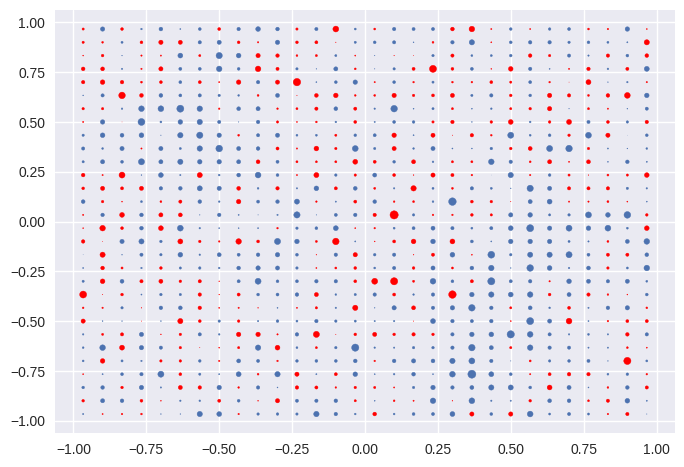

In [11]:
grid_synopsis = create_grid_synopsis(small, 1, 2, seed=1837241)

positive_weights = grid_synopsis[grid_synopsis[:, 2] >= 0]
negative_weights = grid_synopsis[grid_synopsis[:, 2] < 0]

plt.scatter(x=positive_weights[:,0], y=positive_weights[:,1], s=5*positive_weights[:,2])
plt.scatter(x=negative_weights[:,0], y=negative_weights[:,1], s=5*abs(negative_weights[:,2]), c='red')

plt.show()

[[ 0.07955347 -0.78439666]
 [ 0.60781834 -0.24028606]
 [-0.49287309  0.37209383]]


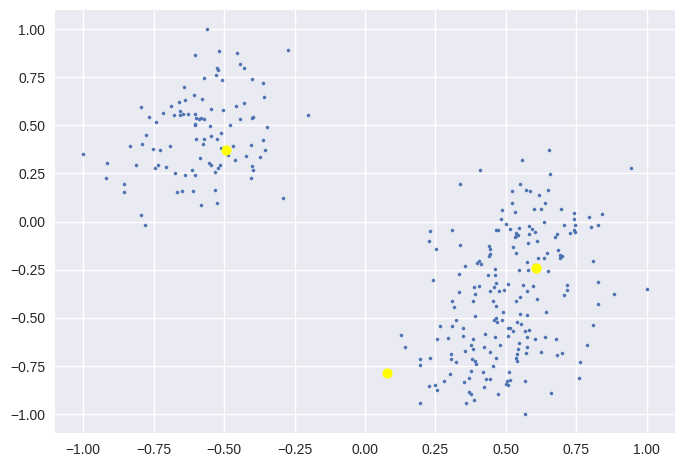

In [12]:
centers = lloyd_with_weights(k=3, X=grid_synopsis[:,:-1], weights=grid_synopsis[:,-1], n_iter=10, rs=25332)
print(centers)
plt.scatter(x=small[:,0], y=small[:,1], s=5)
plt.scatter(x=centers[:,0], y=centers[:,1], c="yellow")

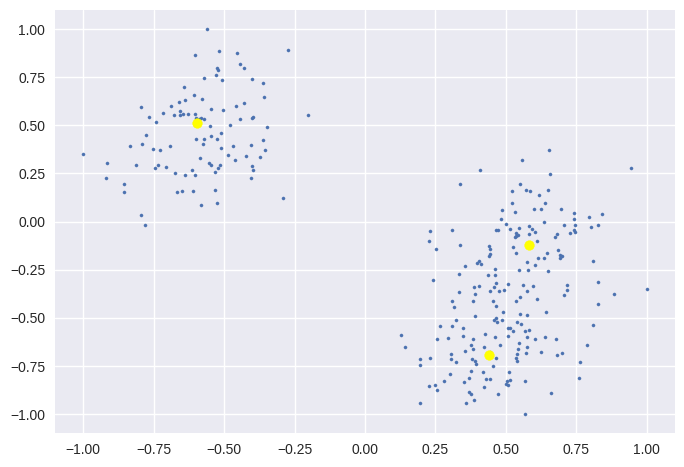

In [13]:
centers = cluster_grid(small, k=3, e=1, M=10, seed=87412421)
plt.scatter(x=small[:,0], y=small[:,1], s=5)
plt.scatter(x=centers[:,0], y=centers[:,1], c="yellow")

Look at K-Means loss for varying values of M

In [16]:
results = np.empty(100)
for m in range(1,101):
    r = grid_experiment(small, k=3, e=1, M=m, n_trials=50)
    print(f"for M={m} average loss over 50 trials={r}")
    results[m-1] = r

for M=1 average loss over 50 trials=0.5628296110266727
for M=2 average loss over 50 trials=0.11427130142389584
for M=3 average loss over 50 trials=0.10111510919452492
for M=4 average loss over 50 trials=0.08444377963460063
for M=5 average loss over 50 trials=0.08017846991812655
for M=6 average loss over 50 trials=0.07614005557408236
for M=7 average loss over 50 trials=0.07258270977985258
for M=8 average loss over 50 trials=0.07050407151503567
for M=9 average loss over 50 trials=0.07118085753260997
for M=10 average loss over 50 trials=0.07029212703937258
for M=11 average loss over 50 trials=0.07372102725725982
for M=12 average loss over 50 trials=0.07255336637280335
for M=13 average loss over 50 trials=0.07243237986645848
for M=14 average loss over 50 trials=0.07797720474442008
for M=15 average loss over 50 trials=0.07915324828934293
for M=16 average loss over 50 trials=0.07831944526140297
for M=17 average loss over 50 trials=0.08016418663122234
for M=18 average loss over 50 trials=0.07

Minimum at 10 with loss value 0.07029212703937258


(300, 2)

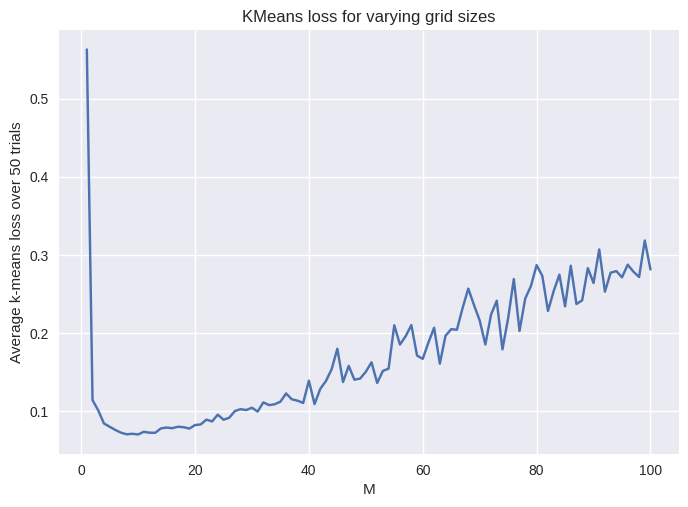

In [17]:
plt.plot(list(range(1,101)), results)
plt.title("KMeans loss for varying grid sizes")
plt.xlabel("M")
plt.ylabel("Average k-means loss over 50 trials")

print(f"Minimum at {np.argmin(results) + 1} with loss value {np.min(results)}")

small.shape

In [18]:
from scipy.stats import wasserstein_distance_nd

grid = create_grid_synopsis(small, e=10, d=2, M=10, seed=897135)

wasserstein_distance_nd(small, grid[:,0:2], np.array([1/300]*300), grid[:,2])


ValueError: All weights must be non-negative.

### Airports Dataset

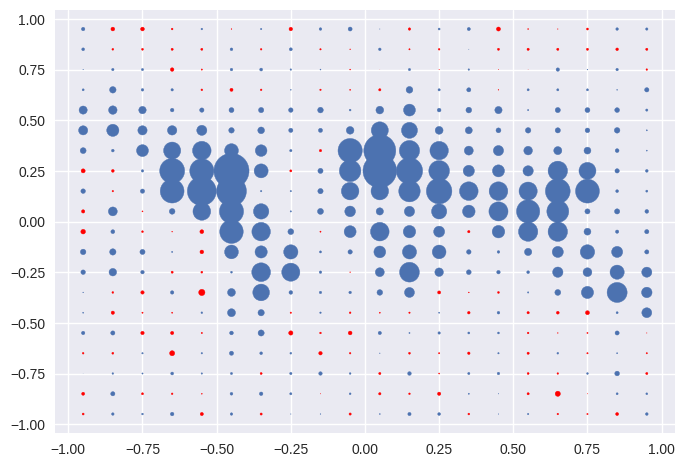

In [19]:
airports = np.load("datasets/airports.npy")
#plt.scatter(x=airports[:,0], y=airports[:,1], s=3)

airport_grid = create_grid_synopsis(airports, e=1, d=2, M=20, seed=138711)
positive_weights = airport_grid[airport_grid[:, 2] >= 0]
negative_weights = airport_grid[airport_grid[:, 2] < 0]

plt.scatter(x=positive_weights[:,0], y=positive_weights[:,1], s=3*positive_weights[:,2])
plt.scatter(x=negative_weights[:,0], y=negative_weights[:,1], s=3*abs(negative_weights[:,2]), c='red')


[[ 0.61774592  0.16066787]
 [ 0.78044623 -0.25277414]
 [ 0.20928723 -0.03023132]
 [ 0.0755491   0.29880392]
 [-0.50814258  0.13183236]]


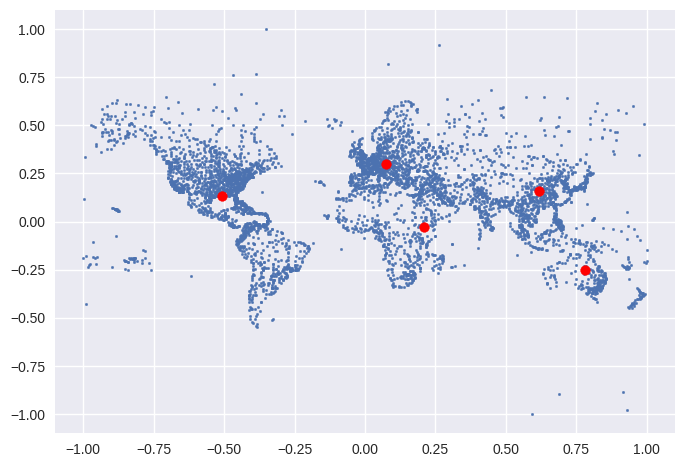

In [28]:
centers = cluster_grid(airports, k=5, e=1, M=30, seed=3874152)
print(centers)
plt.scatter(x=airports[:,0], y=airports[:,1], s=3)
plt.scatter(x=centers[:,0], y=centers[:,1], c="red")

In [44]:
# range k from 3 to 8 
# then check M for each 

results = np.empty((6,10)) # first axis is for k second is for M

# to start do M in intervals of 10 

for k in range(3,9):
    for m_index in range(1,11):
        print(f"k={k} m={m_index*5}")
        r = grid_experiment(data=airports, k=k, e=1, M=m_index*5, n_trials=20)
        results[k-3, m_index-1] = r

k=3 m=5
k=3 m=10
k=3 m=15
k=3 m=20
k=3 m=25
k=3 m=30
k=3 m=35
k=3 m=40
k=3 m=45
k=3 m=50
k=4 m=5
k=4 m=10
k=4 m=15
k=4 m=20
k=4 m=25
k=4 m=30
k=4 m=35
k=4 m=40
k=4 m=45
k=4 m=50
k=5 m=5
k=5 m=10
k=5 m=15
k=5 m=20
k=5 m=25
k=5 m=30
k=5 m=35
k=5 m=40
k=5 m=45
k=5 m=50
k=6 m=5
k=6 m=10
k=6 m=15
k=6 m=20
k=6 m=25
k=6 m=30
k=6 m=35
k=6 m=40
k=6 m=45
k=6 m=50
k=7 m=5
k=7 m=10
k=7 m=15
k=7 m=20
k=7 m=25
k=7 m=30
k=7 m=35
k=7 m=40
k=7 m=45
k=7 m=50
k=8 m=5
k=8 m=10
k=8 m=15
k=8 m=20
k=8 m=25
k=8 m=30
k=8 m=35
k=8 m=40
k=8 m=45
k=8 m=50


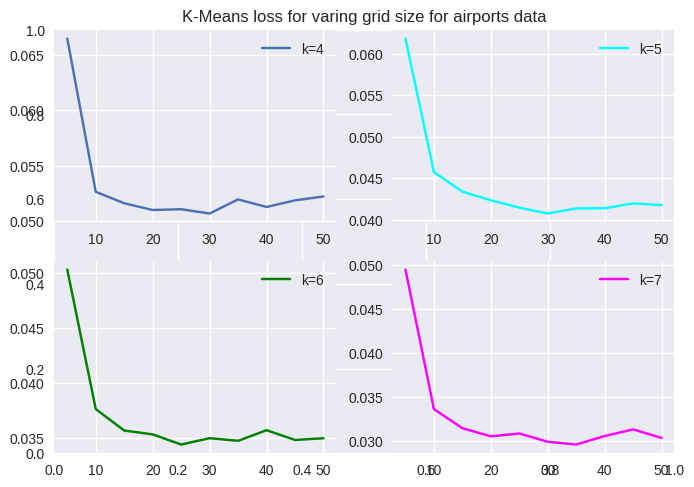

In [48]:
m_range = [i*5 for i in range(1,11)]

plt.title("K-Means loss for varing grid size for airports data")
plt.subplot(2,2,1)
plt.plot(m_range, results[1,:])
plt.legend(["k=4"])

plt.subplot(2,2,2)
plt.plot(m_range, results[2,:], c="cyan")
plt.legend(["k=5"])

plt.subplot(2,2,3)
plt.plot(m_range, results[3,:], c="green")
plt.legend(["k=6"])

plt.subplot(2,2,4)
plt.plot(m_range, results[4,:], c="magenta")
plt.legend(["k=7"])

graphs shows m=25 or m = 30 would be a good choice for this data. 
should maybe return to try larger grid sizes - i expect the loss to eventually increase due to increased noise

(6, 10)

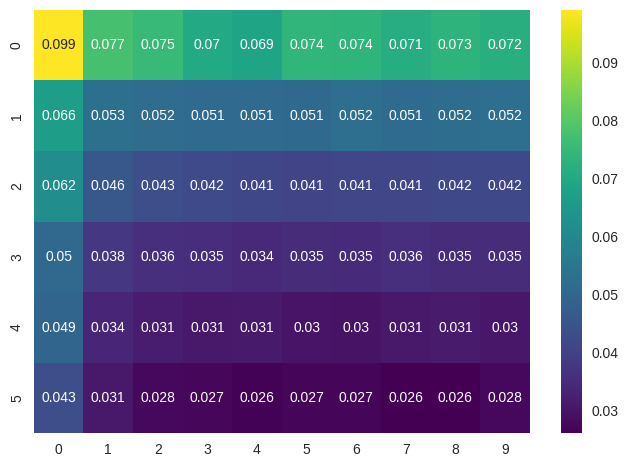

In [ ]:
import seaborn as sns

sns.heatmap(results,
            annot=True,
            cmap="viridis")

results.shape 
# not sure this plot is very useful

### Iris Dataset

(150, 4)

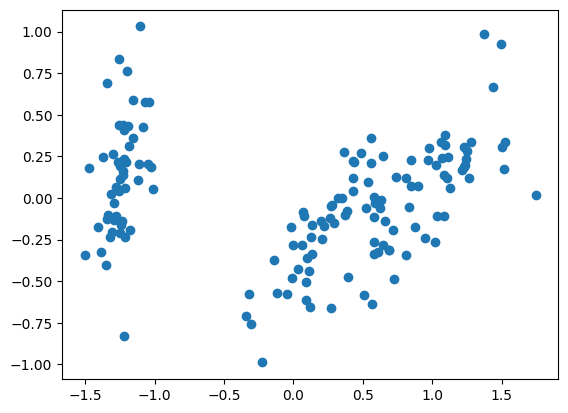

In [9]:
iris = np.load("datasets/iris.npy")

pca = PCA(n_components=2)
iris_2d = pca.fit_transform(iris)
plt.scatter(iris_2d[:,0], iris_2d[:,1])

iris.shape

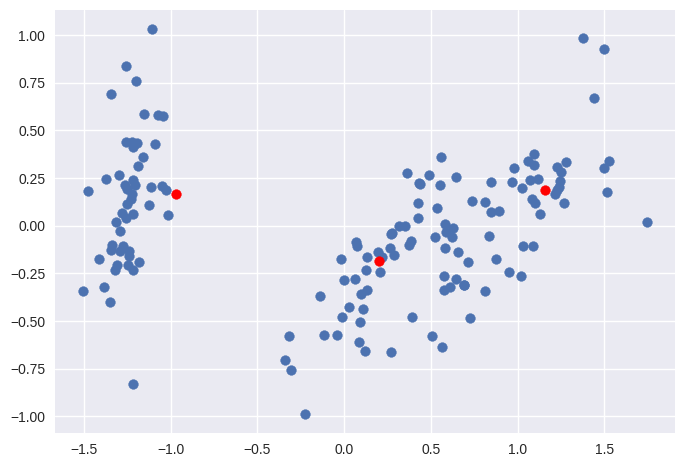

In [71]:
centers = cluster_grid(iris, k=3, e=1, M=3, seed=4323242)
centers_2d = pca.transform(centers)

plt.scatter(iris_2d[:,0], iris_2d[:,1])
plt.scatter(centers_2d[:,0], centers_2d[:,1], c="red")

In [69]:
iris_results = np.empty(20)

for m in range(1,20):
    r = grid_experiment(iris, k=3, e=1, M=m, n_trials=50)
    print(f"m={m} loss={r}")
    iris_results[m-1] = r

m=1 loss=1.1435035297434761
m=2 loss=0.40848498538687594
m=3 loss=0.27960132473271865
m=4 loss=0.33158265962780903
m=5 loss=0.40821816748185485
m=6 loss=0.5915581543232943
m=7 loss=0.7530326038116244
m=8 loss=1.081151997396958
m=9 loss=0.9774276718929655
m=10 loss=1.193726024722135
m=11 loss=1.2886771350179338
m=12 loss=1.41732764448271
m=13 loss=1.257005278658602
m=14 loss=1.655541057807218
m=15 loss=1.5408774611257587
m=16 loss=1.2848031341565527
m=17 loss=1.3300464941902501
m=18 loss=1.412757189941582
m=19 loss=1.485493662074521


Text(0, 0.5, 'average k-means loss over 50 trials')

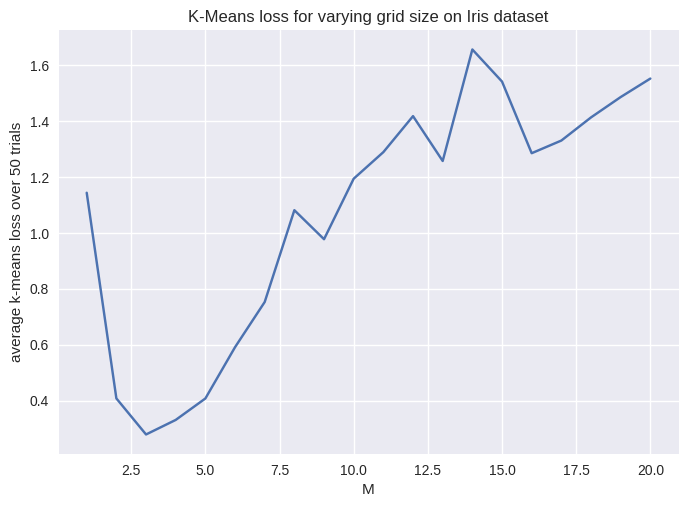

In [72]:
iris_results[19] = grid_experiment(iris, k=3, e=1, M=20, n_trials=50)

plt.plot(list(range(1,21)), iris_results)
plt.title("K-Means loss for varying grid size on Iris dataset")
plt.xlabel("M")
plt.ylabel("average k-means loss over 50 trials")

### Large Synthetic

In [3]:
large = np.load("datasets/large-synthetic.npy")
centers = cluster_grid(large, k=10, e=1, M=1, seed=1212412)
print(centers)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

won't run with even M=2 presumably due to memory requirements. this shows that no matter the choice of M, this algorithm will not work on very high dimensional datasets

### Concrete

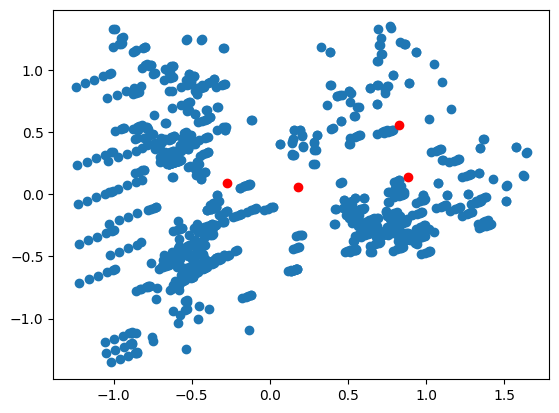

In [8]:
concrete = np.load("datasets/concrete.npy")
concrete_centers = cluster_grid(concrete, k=4, e=1, M=3, seed=21323)

concrete_pca = PCA(n_components=2)
concrete_2d = concrete_pca.fit_transform(concrete)
concrete_centers_2d = concrete_pca.transform(concrete_centers)

plt.scatter(concrete_2d[:,0], concrete_2d[:,1])
plt.scatter(concrete_centers_2d[:,0], concrete_centers_2d[:,1], c="red")

In [4]:
# can cope with up to M=4 but doesn't get good results 

for k in range(3,6):
    for m in range(2,5):
        loss = grid_experiment(data=concrete, k=k, e=1, M=m, n_trials=10)
        print(f"k={k} M={m} loss={loss}")

k=3 M=2 loss=1.5083356248152673
k=3 M=3 loss=1.4453022260940198
k=3 M=4 loss=1.7420310173476767
k=4 M=2 loss=1.430185684174182
k=4 M=3 loss=1.3181703762672972
k=4 M=4 loss=1.6570810462825112
k=5 M=2 loss=1.3917668368357476
k=5 M=3 loss=1.3089495094343966
k=5 M=4 loss=1.571985684339089
